# Base info
+ Info that will be used accross all parts of the notebook.

In [14]:
METRICS = [
    "MAE",
    "MSE",
    "RMSE",
    "AUC", 
    "MAP",
    "Precision@20",
    "Recall@20",
    "NDCG@20",
    "Precision@100",
    "Recall@100",
    "NDCG@100",
]

CLASSIFICATION_ALGORITHMS = [
    "UserKNN-Amplified",
    "UserKNN-BM25",
    "UserKNN-Cosine",
    "UserKNN-IDF",
    "ItemKNN-AdjustedCosine",
    "BPR",
    "MF",
    "SVD",
    "PMF",
    "NMF"
]

FEATURES = [
    "num_ratings",
    "log_num_ratings",
    "gini",
    "rating_avg",
    "rating_std",
    "phi_avg",
    "phi_std",
    "proportion_long_tailors",
    "avg_entropy",
    "abnormality",
    "abnormality_CR",
    "itens_avg_num_ratings",
    "avg_rating_from_itens_consumed",
]

DS = "ml-1M"

# Metrics Study

+ Distribuição das métricas dos algoritmos de classificação para alguns algoritmos escolhidos.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def get_from_metric_csv(dataset, metric, algo):
    df = pd.read_csv(f'../user_features_table/{dataset}/{metric}.csv', sep='\s*,\s*',
                     index_col=0, engine='python')
    metric = df[[algo]].to_numpy().flatten()
    return metric

def plot_histo(x, x_label, title, bins=15):
    plt.hist(x, density=True, bins=bins, alpha=0.5, label=x_label)
    plt.ylabel('Probability (%)')
    plt.legend(loc='upper right')
    plt.title(title)

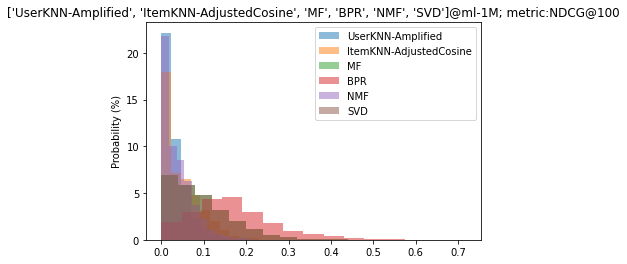

In [6]:
# Normalized Discount Cumulative Gain (NDCG) @ 100

metric = "NDCG@100"
algos = ["UserKNN-Amplified", "ItemKNN-AdjustedCosine", "MF", "BPR", "NMF", "SVD"]
dataset = "ml-1M"

for algo in algos:
    plot_histo(get_from_metric_csv(dataset, metric, algo), algo, f'{algos}@{dataset}; metric:{metric}')

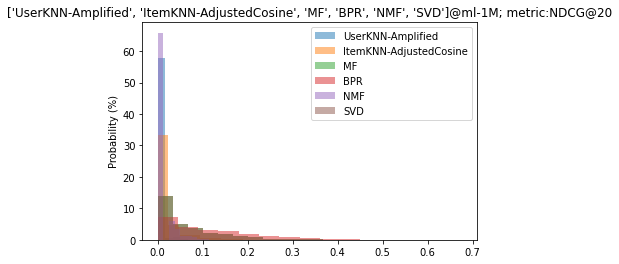

In [7]:
# Normalized Discount Cumulative Gain (NDCG) @ 20

metric = "NDCG@20"
algos = ["UserKNN-Amplified", "ItemKNN-AdjustedCosine", "MF", "BPR", "NMF", "SVD"]
dataset = "ml-1M"

for algo in algos:
    plot_histo(get_from_metric_csv(dataset, metric, algo), algo, f'{algos}@{dataset}; metric:{metric}')

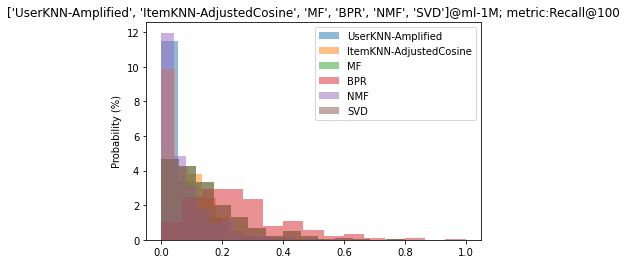

In [8]:
# Recall @ 100

metric = "Recall@100"
algos = ["UserKNN-Amplified", "ItemKNN-AdjustedCosine", "MF", "BPR", "NMF", "SVD"]
dataset = "ml-1M"

for algo in algos:
    plot_histo(get_from_metric_csv(dataset, metric, algo), algo, f'{algos}@{dataset}; metric:{metric}')

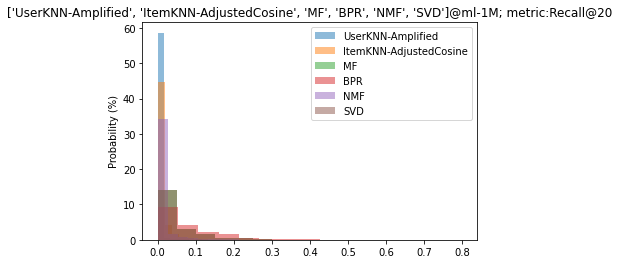

In [9]:
# Recall @ 20

metric = "Recall@20"
algos = ["UserKNN-Amplified", "ItemKNN-AdjustedCosine", "MF", "BPR", "NMF", "SVD"]
dataset = "ml-1M"

for algo in algos:
    plot_histo(get_from_metric_csv(dataset, metric, algo), algo, f'{algos}@{dataset}; metric:{metric}')

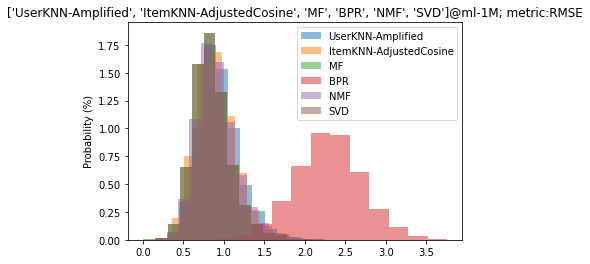

In [10]:
# RMSE

metric = "RMSE"
algos = ["UserKNN-Amplified", "ItemKNN-AdjustedCosine", "MF", "BPR", "NMF", "SVD"]
dataset = "ml-1M"

for algo in algos:
    plot_histo(get_from_metric_csv(dataset, metric, algo), algo, f'{algos}@{dataset}; metric:{metric}')

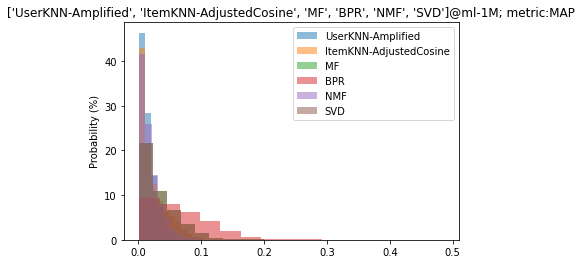

In [11]:
# MAP

metric = "MAP"
algos = ["UserKNN-Amplified", "ItemKNN-AdjustedCosine", "MF", "BPR", "NMF", "SVD"]
dataset = "ml-1M"

for algo in algos:
    plot_histo(get_from_metric_csv(dataset, metric, algo), algo, f'{algos}@{dataset}; metric:{metric}')

# Features Study
+ Distribution of features

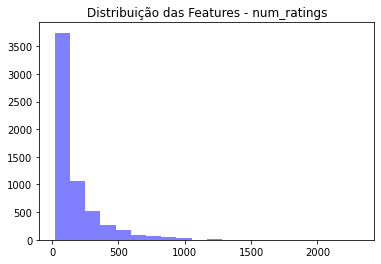

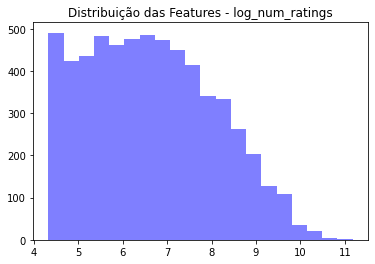

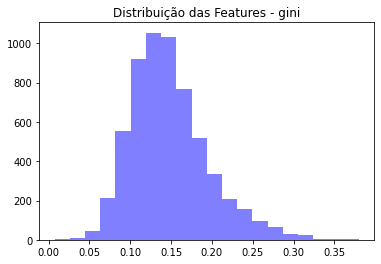

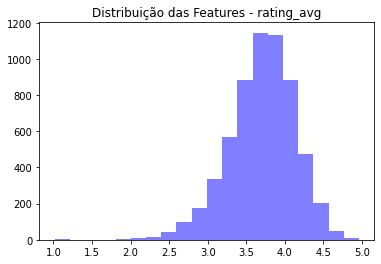

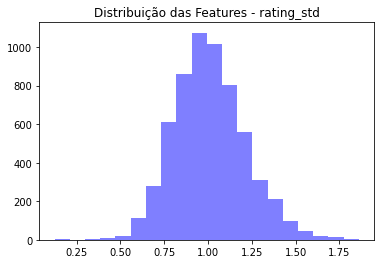

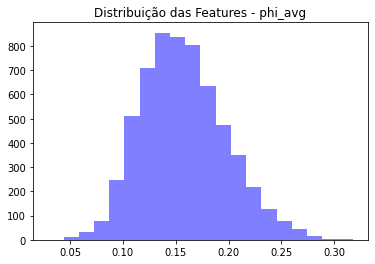

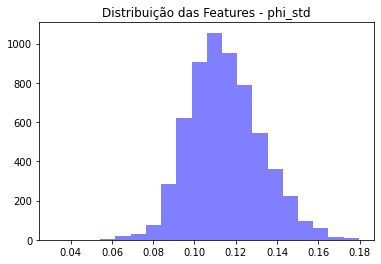

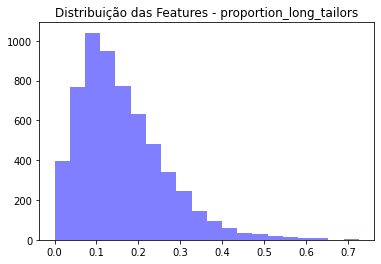

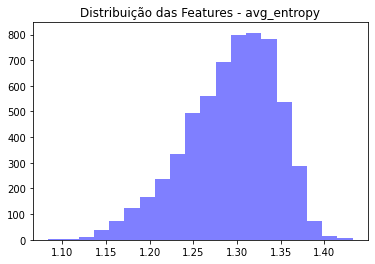

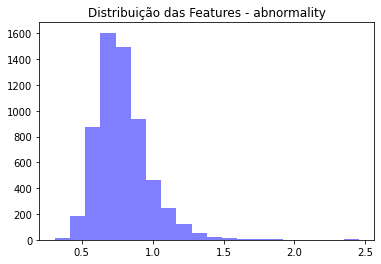

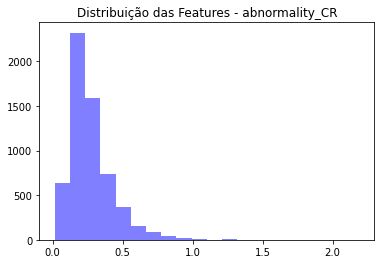

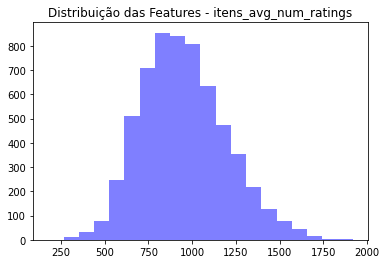

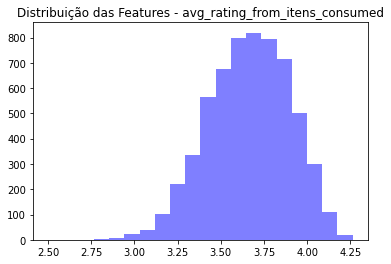

In [15]:
for f in FEATURES:
    df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                              sep='\s*,\s*', index_col=0, engine='python')

    feat_arr = df_features[[f]].to_numpy().flatten()

    num_bins = 20
    n, bins, patches = plt.hist(feat_arr, num_bins, facecolor='blue', alpha=0.5)
    plt.title(f"Distribuição das Features - {f}")
    plt.show()

# Estudo da Relação Linear entre as Features e as métricas do classificador

In [20]:
from scipy import stats
import numpy as np

def get_features_from_pandas(df, features_str, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs])
        Y.append(ys[i])
    return np.array(X), np.array(Y)

def plt_chart(x, y, title, x_label, y_label):
    fig, ax = plt.subplots()
    ax.scatter(x, y)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

def get_corr(x, y):
    # (correlation, p-value)
    pearson = stats.pearsonr(x, y)
    # SpearmanrResult(correlation, pvalue)
    spearman = stats.spearmanr(x, y)
    # KendalltauResult(correlation, pvalue)
    kendall = stats.kendalltau(x, y)
    print(f'Pearson:\n\tcorr: {round(pearson[0], 3)}\n\tp-value: {round(pearson[0], 3)}\n')
    print(f'Spearman:\n\tcorr: {round(spearman.correlation, 3)}\n\tp-value: {round(spearman.pvalue, 3)}\n')
    print(f'Kendall:\n\tcorr: {round(kendall.correlation, 3)}\n\tp-value: {round(kendall.pvalue, 3)}\n')

UserKNN-Amplified - NDCG@100 - log_num_ratings
Pearson:
	corr: -0.002
	p-value: -0.002

Spearman:
	corr: 0.003
	p-value: 0.817

Kendall:
	corr: 0.002
	p-value: 0.817


UserKNN-Amplified - NDCG@100 - rating_std
Pearson:
	corr: -0.011
	p-value: -0.011

Spearman:
	corr: -0.009
	p-value: 0.494

Kendall:
	corr: -0.006
	p-value: 0.487


UserKNN-Amplified - NDCG@100 - avg_entropy
Pearson:
	corr: -0.002
	p-value: -0.002

Spearman:
	corr: -0.001
	p-value: 0.94

Kendall:
	corr: -0.001
	p-value: 0.94


UserKNN-Amplified - NDCG@100 - abnormality
Pearson:
	corr: -0.019
	p-value: -0.019

Spearman:
	corr: -0.019
	p-value: 0.13

Kendall:
	corr: -0.014
	p-value: 0.132


BPR - NDCG@100 - log_num_ratings
Pearson:
	corr: 0.003
	p-value: 0.003

Spearman:
	corr: 0.004
	p-value: 0.76

Kendall:
	corr: 0.003
	p-value: 0.764


BPR - NDCG@100 - rating_std
Pearson:
	corr: 0.014
	p-value: 0.014

Spearman:
	corr: 0.018
	p-value: 0.168

Kendall:
	corr: 0.012
	p-value: 0.166


BPR - NDCG@100 - avg_entropy
Pearson:
	c

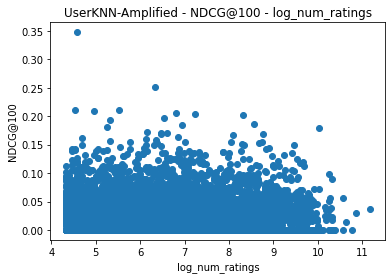

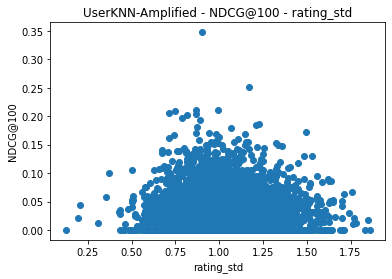

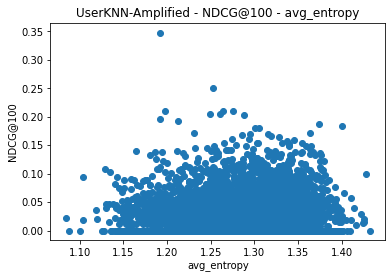

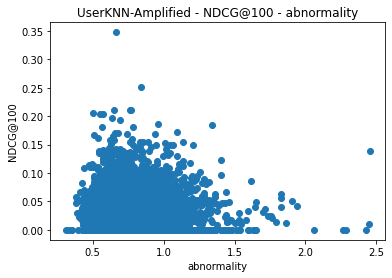

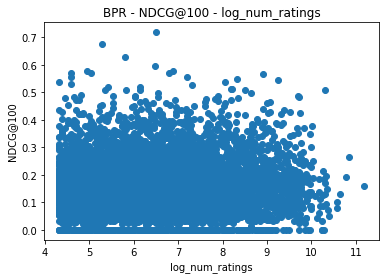

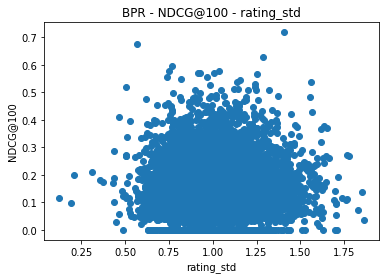

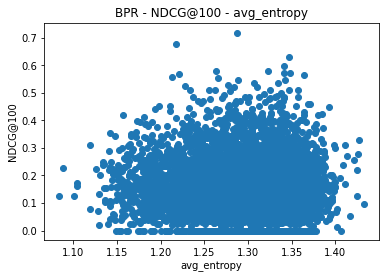

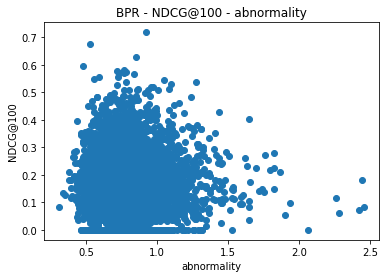

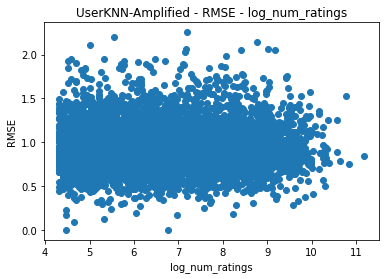

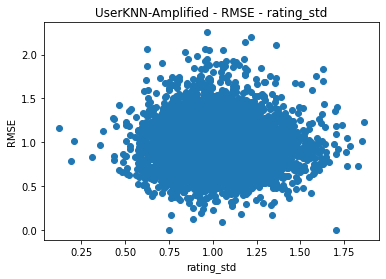

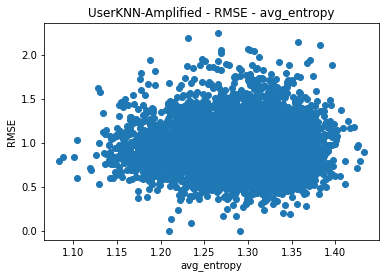

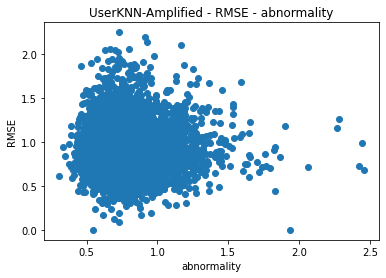

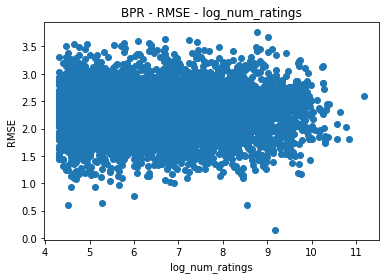

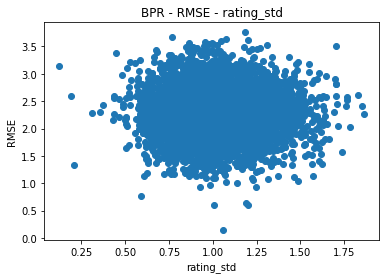

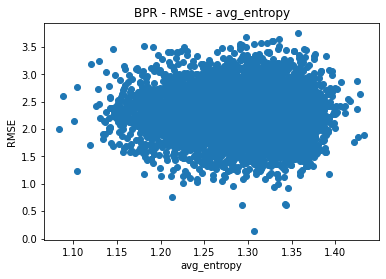

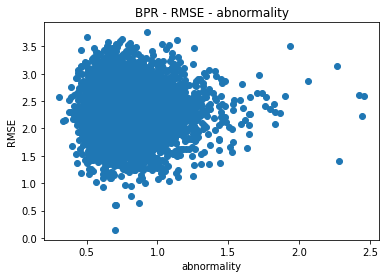

In [28]:
# metrics = ["Recall@100", "NDCG@100", "RMSE", "Precision@20"]
# algos = ["UserKNN-Amplified", "ItemKNN-AdjustedCosine", "MF", "BPR", "NMF", "SVD"]
# features = ["log_num_ratings", "gini", "rating_std", "avg_entropy", "abnormality", "itens_avg_num_ratings"]

metrics = ["NDCG@100", "RMSE"]
algos = ["UserKNN-Amplified", "BPR"]
features = ["log_num_ratings", "rating_std", "avg_entropy", "abnormality"]

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
for metric in metrics:
    for algo in algos:
        for feature in features:
            df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                    sep='\s*,\s*', index_col=0, engine='python')
            df = df_features.join(df_models)

            x_, y_ = get_features_from_pandas(df, [feature], algo)
            x, y = [], []
            for i in range(len(x_)):
                if not np.isnan(y_[i]) and not np.isnan(x_[i]):
                    x.append(x_[i][0])
                    y.append(y_[i])

            plt_chart(x, y, f"{algo} - {metric} - {feature}", feature, metric)
            print(f"{algo} - {metric} - {feature}")
            get_corr(x, y)
            print()

# Estudo da possibilidade de classificação em grupos utilizando as features

Para as métricas analisadas, vamos pegar os melhores U% de usuários em cada extremo da curva da métrica do classificador.

Por exemplo, para o classificador BPR e métrica RMSE, vamos pegar os U% usuários com o maior RMSE, e os U% com o menor RMSE. Usando as features escolhidas, vamos tentar prever em qual grupo um usuário de teste cairia.

Tentaremos com dois algoritmos de classificação: SVM e RandomForest.

In [29]:
def divide_into_extreme_groups(df, algo="BPR", extreme_amount=0.01):
    sorted_df = df.sort_values(by=[algo])
    sizes = int(len(sorted_df)*extreme_amount)
    head = sorted_df.head(sizes)
    tail = sorted_df.tail(sizes)
    
    X_tail, X_head, Y_tail, Y_head = [], [], ['bad' for _ in range(sizes)], ['good' for _ in range(sizes)]
    
    for i in range(sizes):
        x_head = [f for f in head.iloc[i][FEATURES]]
        x_tail = [f for f in tail.iloc[i][FEATURES]]
        X_head.append(x_head)
        X_tail.append(x_tail)
    
    return (X_tail+X_head, Y_tail+Y_head)

In [37]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score

metrics = ["NDCG@100", "RMSE", "Precision@20"]
algos = ["UserKNN-Amplified", "BPR"]
ammount = 0.15

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
for algo in algos:
    for metric in metrics:
        df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                sep='\s*,\s*', index_col=0, engine='python')
        df = df_features.join(df_models)

        X, y = divide_into_extreme_groups(df, algo=algo, extreme_amount=ammount)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)  
        ml = svm.SVC()
        ml.fit(X_train, y_train)
        mean_acc = ml.score(X_test, y_test)
        y_pred = ml.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        # print metrics
        print(f'{metric}@{algo} -> SVM Classifier')
        print(f'{metric}@{algo} -> getting top/botton: {ammount*100}%')
        print(f'{metric}@{algo} -> classifier_mean_acc: {round(mean_acc, 3)}')
        print(f'{metric}@{algo} -> f1_score: {round(f1, 3)}')
        print(f'{metric}@{algo} -> confusion matrix [actual (linhas) vs predicted (colunas)]:')
        print(cm)
        print()

NDCG@100@UserKNN-Amplified -> SVM Classifier
NDCG@100@UserKNN-Amplified -> getting top/botton: 15.0%
NDCG@100@UserKNN-Amplified -> classifier_mean_acc: 0.506
NDCG@100@UserKNN-Amplified -> f1_score: 0.506
NDCG@100@UserKNN-Amplified -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[115 108]
 [116 114]]

RMSE@UserKNN-Amplified -> SVM Classifier
RMSE@UserKNN-Amplified -> getting top/botton: 15.0%
RMSE@UserKNN-Amplified -> classifier_mean_acc: 0.512
RMSE@UserKNN-Amplified -> f1_score: 0.507
RMSE@UserKNN-Amplified -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[ 92 131]
 [ 90 140]]

Precision@20@UserKNN-Amplified -> SVM Classifier
Precision@20@UserKNN-Amplified -> getting top/botton: 15.0%
Precision@20@UserKNN-Amplified -> classifier_mean_acc: 0.539
Precision@20@UserKNN-Amplified -> f1_score: 0.538
Precision@20@UserKNN-Amplified -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[113 110]
 [ 99 131]]

NDCG@100@BPR -> SVM Classifier
NDCG@100@BPR -> ge

In [39]:
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, f1_score

metrics = ["NDCG@100", "RMSE", "Precision@20"]
algos = ["UserKNN-Amplified", "BPR"]
ammount = 0.15

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
for algo in algos:
    for metric in metrics:
        df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                sep='\s*,\s*', index_col=0, engine='python')
        df = df_features.join(df_models)

        X, y = divide_into_extreme_groups(df, algo=algo, extreme_amount=ammount)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)  
        ml = RandomForestClassifier()
        ml.fit(X_train, y_train)
        mean_acc = ml.score(X_test, y_test)
        y_pred = ml.predict(X_test)

        cm = confusion_matrix(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='macro')

        # print metrics
        print(f'{metric}@{algo} -> RandomForest Classifier')
        print(f'{metric}@{algo} -> getting top/botton: {ammount*100}%')
        print(f'{metric}@{algo} -> classifier_mean_acc: {round(mean_acc, 3)}')
        print(f'{metric}@{algo} -> f1_score: {round(f1, 3)}')
        print(f'{metric}@{algo} -> confusion matrix [actual (linhas) vs predicted (colunas)]:')
        print(cm)
        print()

NDCG@100@UserKNN-Amplified -> RandomForest Classifier
NDCG@100@UserKNN-Amplified -> getting top/botton: 15.0%
NDCG@100@UserKNN-Amplified -> classifier_mean_acc: 0.547
NDCG@100@UserKNN-Amplified -> f1_score: 0.547
NDCG@100@UserKNN-Amplified -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[130  93]
 [112 118]]

RMSE@UserKNN-Amplified -> RandomForest Classifier
RMSE@UserKNN-Amplified -> getting top/botton: 15.0%
RMSE@UserKNN-Amplified -> classifier_mean_acc: 0.483
RMSE@UserKNN-Amplified -> f1_score: 0.482
RMSE@UserKNN-Amplified -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[122 101]
 [133  97]]

Precision@20@UserKNN-Amplified -> RandomForest Classifier
Precision@20@UserKNN-Amplified -> getting top/botton: 15.0%
Precision@20@UserKNN-Amplified -> classifier_mean_acc: 0.528
Precision@20@UserKNN-Amplified -> f1_score: 0.527
Precision@20@UserKNN-Amplified -> confusion matrix [actual (linhas) vs predicted (colunas)]:
[[116 107]
 [107 123]]

NDCG@100@BPR -> Random

# Confiança do classificador

Para observar a confiança do recomendador, vamos rodar uma regressão e plotar a confiança das previsões.

In [75]:
import numpy as np
from matplotlib import pyplot as plt
import forestci as fci

def get_features_from_pandas(df, features_str, algo):
    X, Y = [], []
    xs = [[] for _ in range(len(features_str))]
    
    for i, f in enumerate(features_str):
        xs[i] = df[[f]].to_numpy().flatten()
    ys = df[[algo]].to_numpy().flatten()
    
    for i in range(len(xs[0])):
        X.append([x[i] for x in xs])
        Y.append(ys[i])
    return np.array(X), np.array(Y)

def plot_with_confidence(X_train, X_test, y_train, y_test, y_pred, metric, algo, forest):
    # Calculate the variance
    V_IJ_unbiased = fci.random_forest_error(forest, X_train, X_test)

    # Plot error bars for predicted MPG using unbiased variance
    plt.errorbar(y_test, y_pred, yerr=np.sqrt(V_IJ_unbiased), fmt='o')
    plt.plot()
    plt.title(f'Confidence view: {algo} - {metric}')
    plt.xlabel(f'Reported {metric}')
    plt.ylabel(f'Predicted {metric}')
    plt.show()

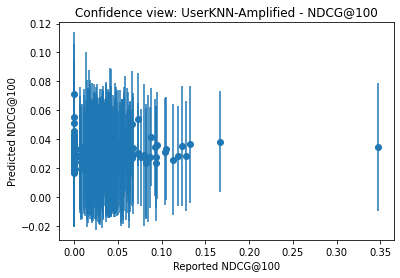

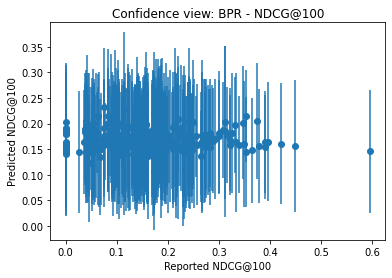

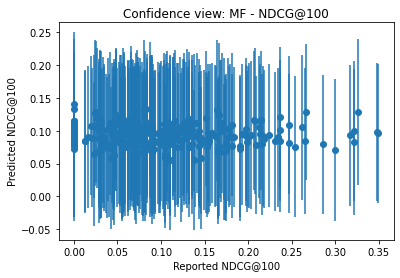

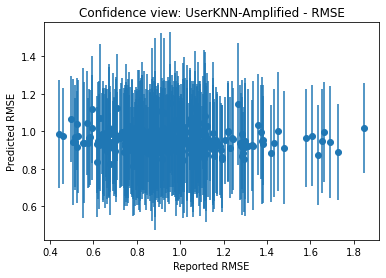

/Users/hdt/Documents/msc/recomendadores/venv/lib/python3.8/site-packages/forestci/calibration.py:86: RuntimeWarning: overflow encountered in exp
  g_eta_raw = np.exp(np.dot(XX, eta)) * mask


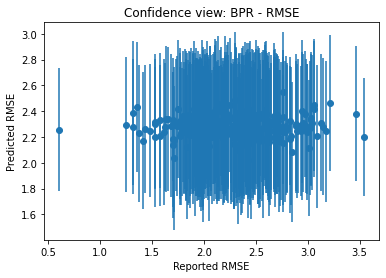

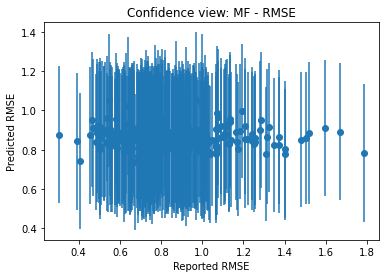

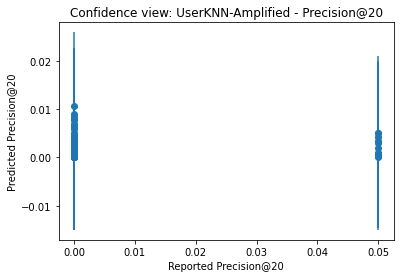

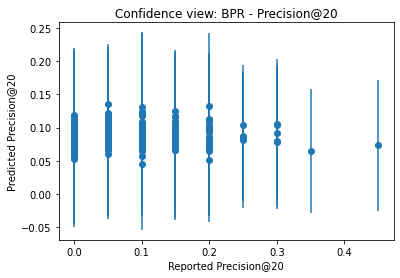

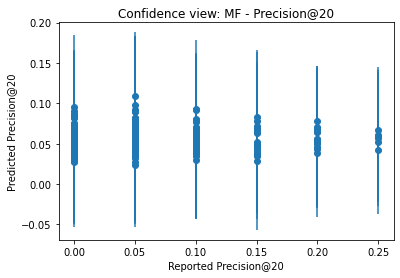

In [51]:
metrics = ["NDCG@100", "RMSE", "Precision@20"]
algos = ["UserKNN-Amplified", "BPR", "MF"]

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
for metric in metrics:
    for algo in algos:
        df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                sep='\s*,\s*', index_col=0, engine='python')
        df = df_features.join(df_models)

        X, y = get_features_from_pandas(df, FEATURES, algo)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=123)
        
        # Create RandomForestRegressor
        n_trees = 150
        forest = RandomForestRegressor(n_estimators=n_trees, random_state=42)
        forest.fit(X_train, y_train)
        y_pred = forest.predict(X_test)
        plot_with_confidence(X_train, X_test, y_train, y_test, y_pred, metric, algo, forest)

# Separabilidade das features

Para observar a separabilidade das features, vamos rodar dois testes usando o mesmo conceito de classes anterior (top U% e bottom U%):

+ Plotar um CDF pra ver como cada classe vai evoluindo para o valor da feature.
+ Gráfico PCA e TSNE como teste de separabilidade.

In [81]:
def divide_into_extreme_groups_for_feature(df, feature, algo="BPR", extreme_amount=0.01):
    sorted_df = df.sort_values(by=[algo])
    sizes = int(len(sorted_df)*extreme_amount)
    head = sorted_df.head(sizes)
    tail = sorted_df.tail(sizes)
    
    X_tail, X_head = [], []
    for i in range(sizes):
        X_head.append(head.iloc[i][feature])
        X_tail.append(tail.iloc[i][feature])
    return X_head, X_tail

def divide_into_extreme_groups(df, algo="BPR", extreme_amount=0.01):
    sorted_df = df.sort_values(by=[algo])
    sizes = int(len(sorted_df)*extreme_amount)
    head = sorted_df.head(sizes)
    tail = sorted_df.tail(sizes)
    
    X_tail, X_head, Y_tail, Y_head = [], [], ['bad' for _ in range(sizes)], ['good' for _ in range(sizes)]
    
    for i in range(sizes):
        x_head = [f for f in head.iloc[i][FEATURES]]
        x_tail = [f for f in tail.iloc[i][FEATURES]]
        X_head.append(x_head)
        X_tail.append(x_tail)
    
    return (X_tail+X_head, Y_tail+Y_head)

def plot_histo(x, x_label, title, bins=15):
    plt.hist(x, cumulative=True, density=True, bins=bins, alpha=1, label=x_label, histtype=u'step')
    plt.ylabel('Probability (%)')
    plt.legend(loc='upper right')
    plt.title(title)

## CDF

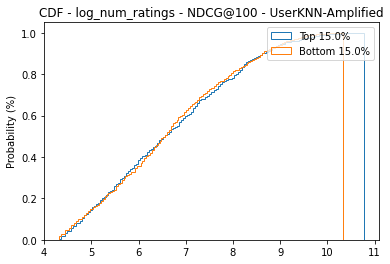

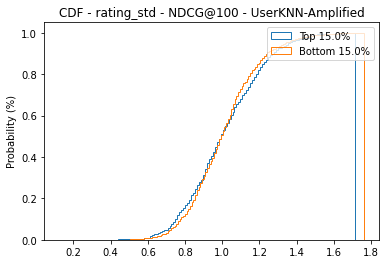

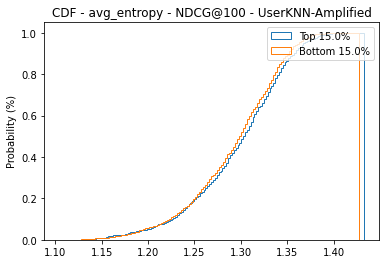

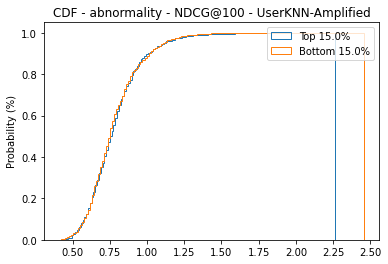

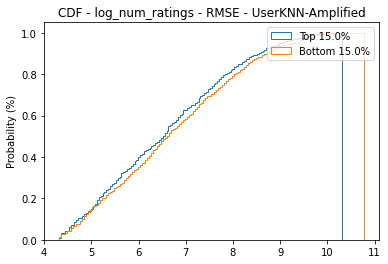

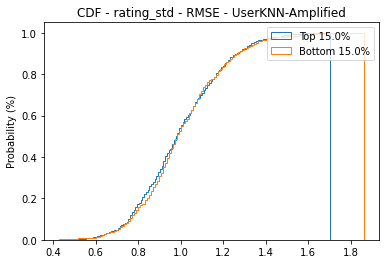

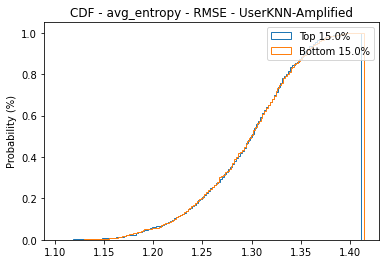

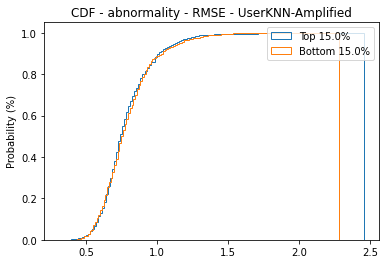

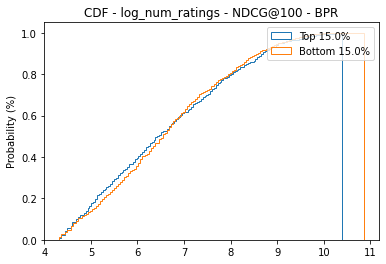

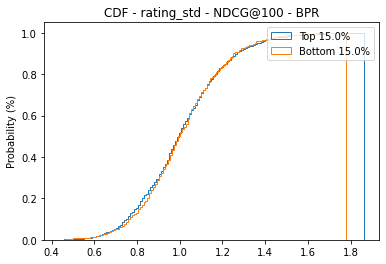

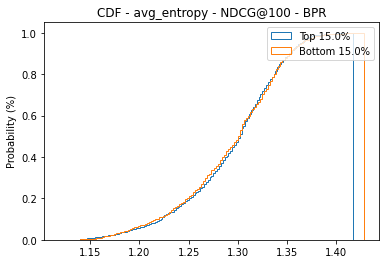

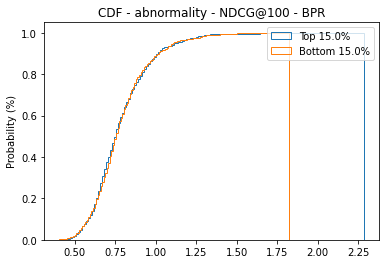

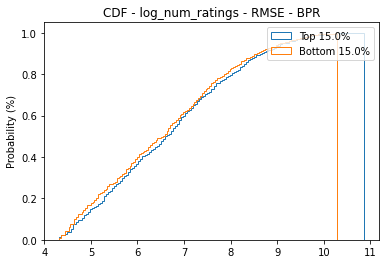

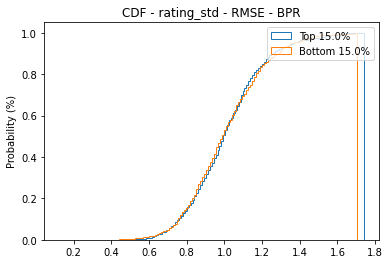

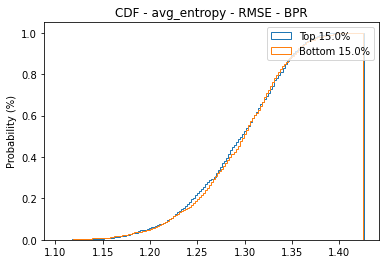

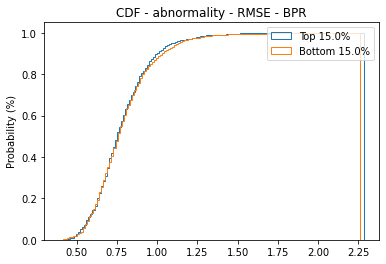

In [79]:
import numpy as np
import pandas as pd

metrics = ["NDCG@100", "RMSE"]
algos = ["UserKNN-Amplified", "BPR"]
features = ["log_num_ratings", "rating_std", "avg_entropy", "abnormality"]
ammount = 0.15

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
for algo in algos:
    for metric in metrics:
        for feat in features:
            df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                    sep='\s*,\s*', index_col=0, engine='python')
            df = df_features.join(df_models)

            X_head, X_tail = divide_into_extreme_groups_for_feature(df=df, algo=algo, feature=feat,
                                                                    extreme_amount=ammount)
            plot_histo(X_head, f"Top {ammount*100}%", f"CDF - {feat} - {metric} - {algo}", 150)
            plot_histo(X_tail, f"Bottom {ammount*100}%", f"CDF - {feat} - {metric} - {algo}", 150)
            plt.show()

## PCA

PCA - NDCG@100 - UserKNN-Amplified


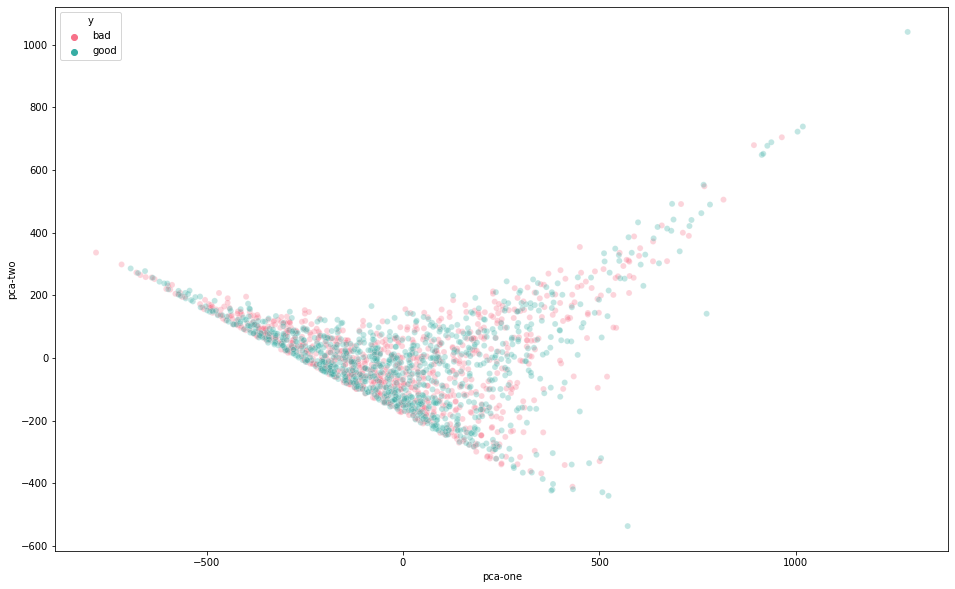

PCA - RMSE - UserKNN-Amplified


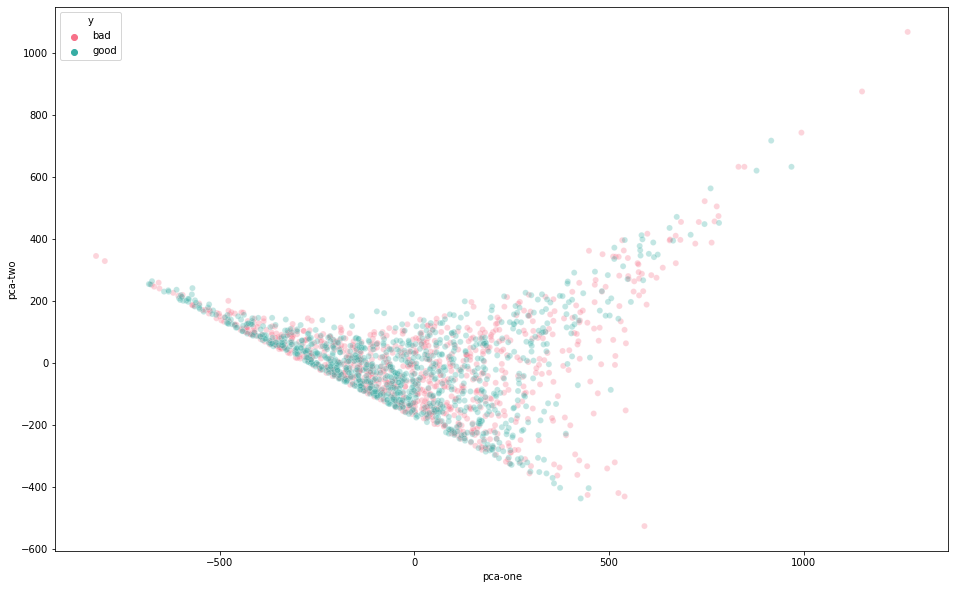

PCA - Precision@20 - UserKNN-Amplified


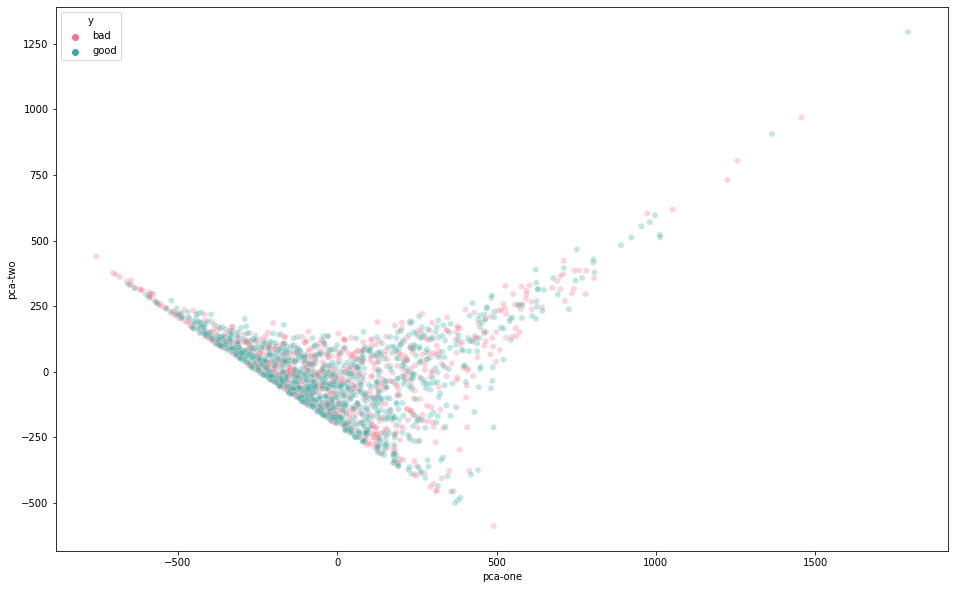

PCA - NDCG@100 - BPR


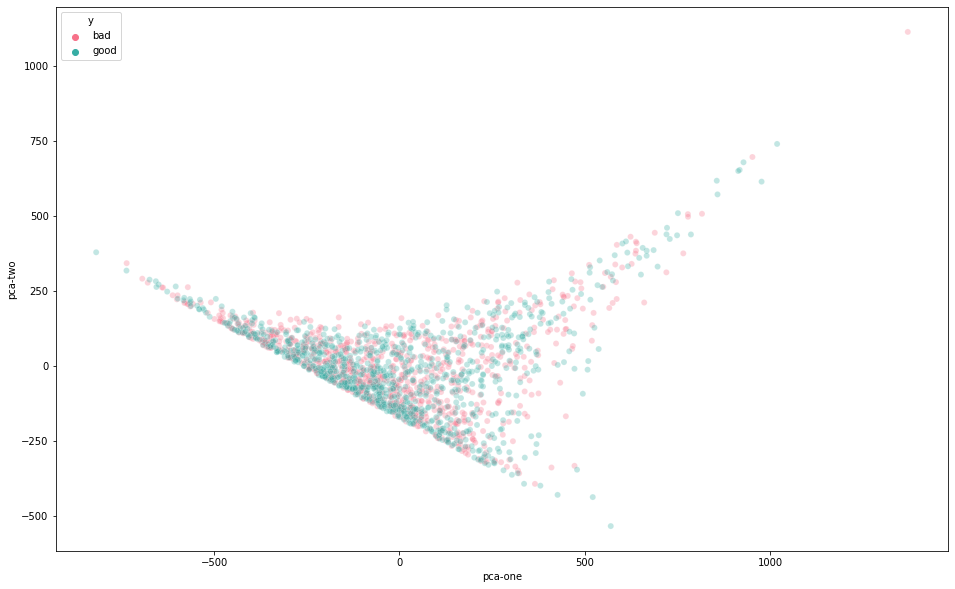

PCA - RMSE - BPR


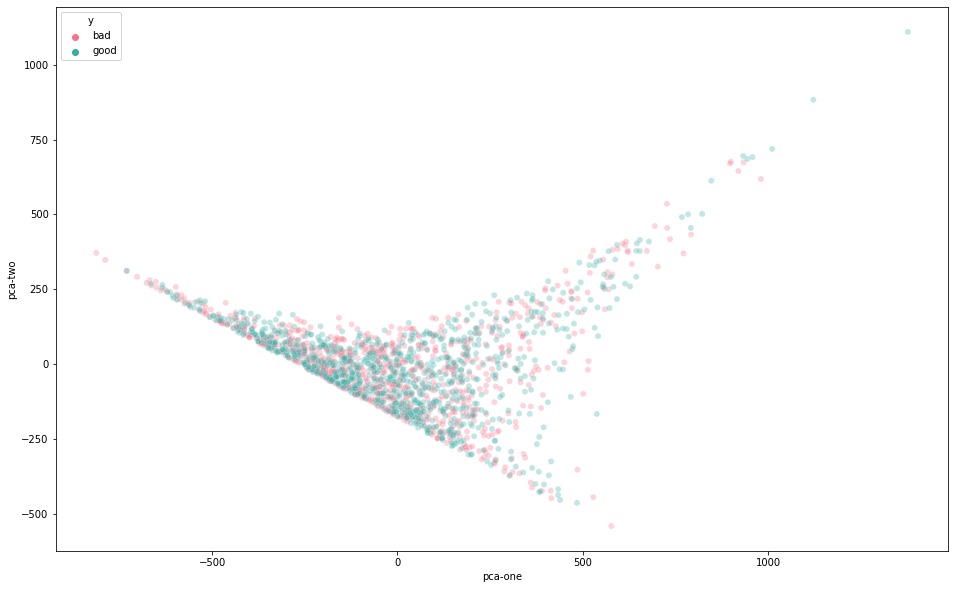

PCA - Precision@20 - BPR


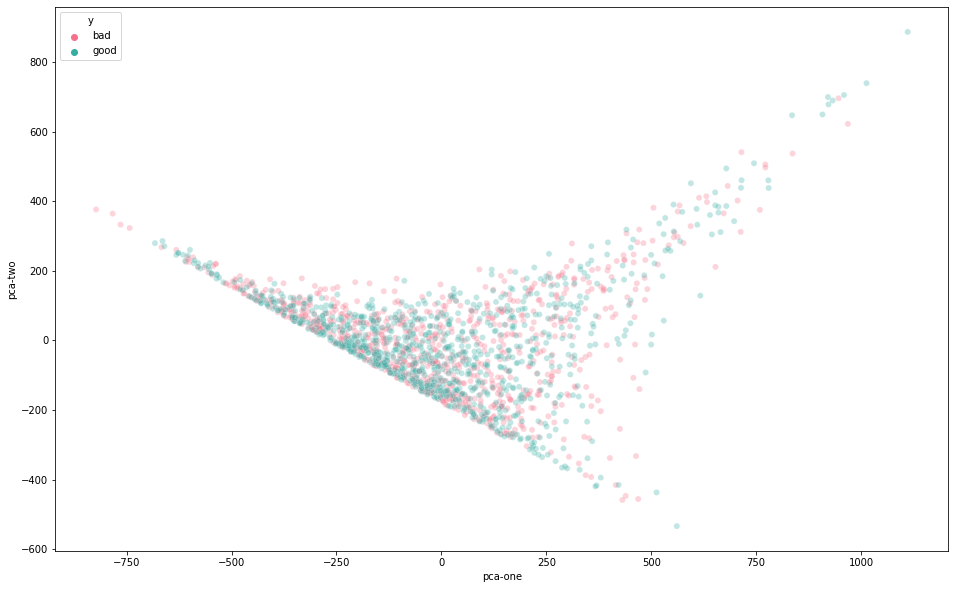

PCA - NDCG@100 - MF


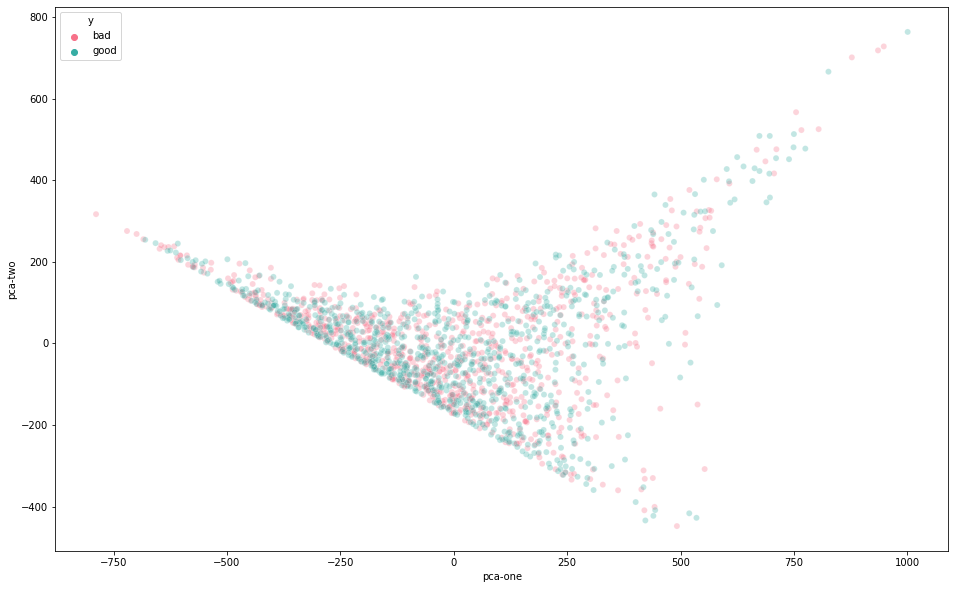

PCA - RMSE - MF


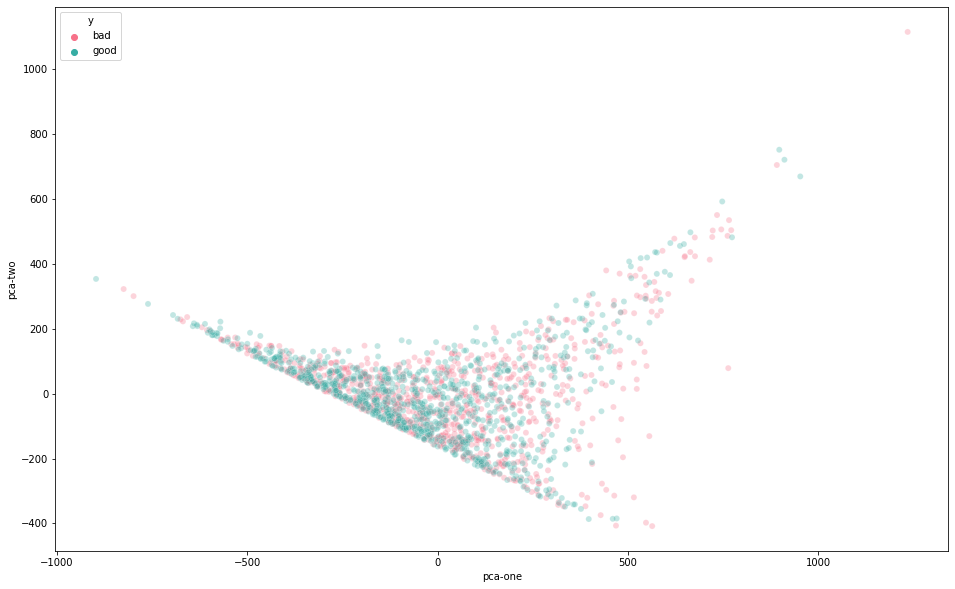

PCA - Precision@20 - MF


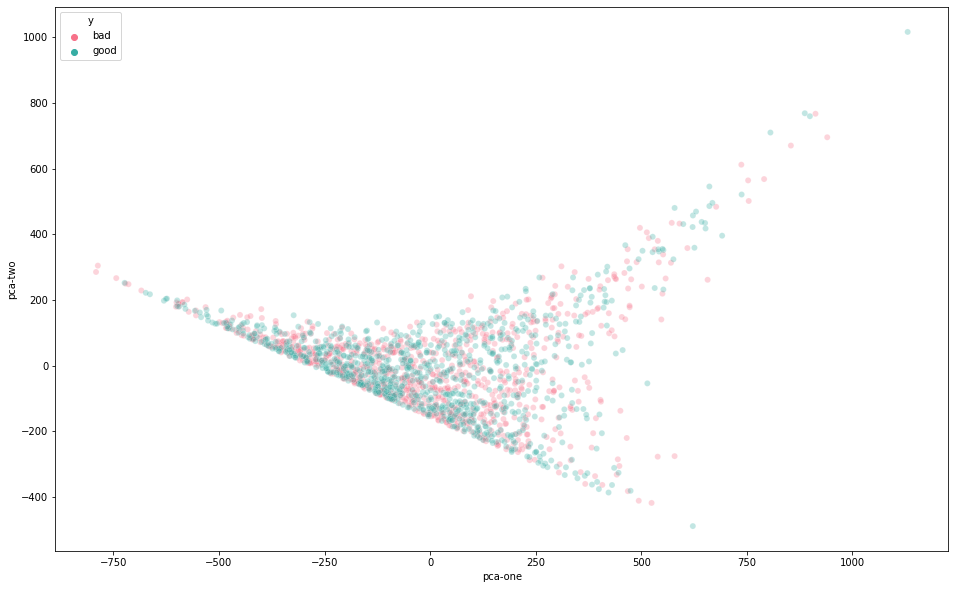

In [101]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

metrics = ["NDCG@100", "RMSE", "Precision@20"]
algos = ["UserKNN-Amplified", "BPR", "MF"]
ammount = 0.10

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
for algo in algos:
    for metric in metrics:
        df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                sep='\s*,\s*', index_col=0, engine='python')
        df = df_features.join(df_models)

        X, y = divide_into_extreme_groups(df=df, algo=algo, extreme_amount=ammount)
        pca = PCA(n_components=3)
        pca_result = pca.fit_transform(X)
        dfr = pd.DataFrame({})
        dfr['pca-one'] = pca_result[:,0]
        dfr['pca-two'] = pca_result[:,1]
        dfr['pca-three'] = pca_result[:,2]
        dfr['y'] = y
        
        print(f'PCA - {metric} - {algo}')
        plt.figure(figsize=(16,10))
        sns.scatterplot(
            x="pca-one", y="pca-two",
            hue="y",
            palette=sns.color_palette("husl", 2),
            data=dfr,
            legend="full",
            alpha=0.3
        )
        plt.show()

## t-SNE

t-SNE - UserKNN-Amplified - NDCG@100


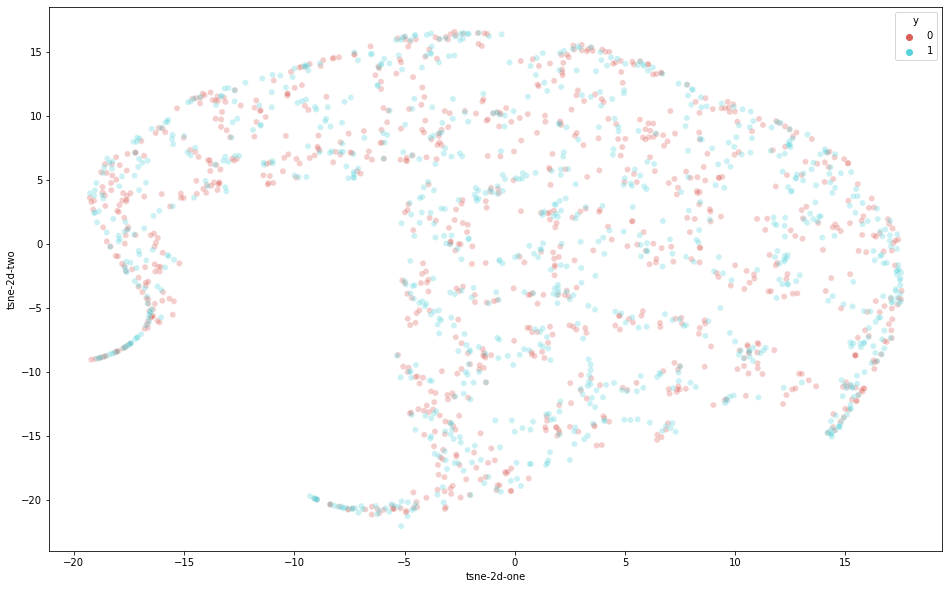

t-SNE - UserKNN-Amplified - RMSE


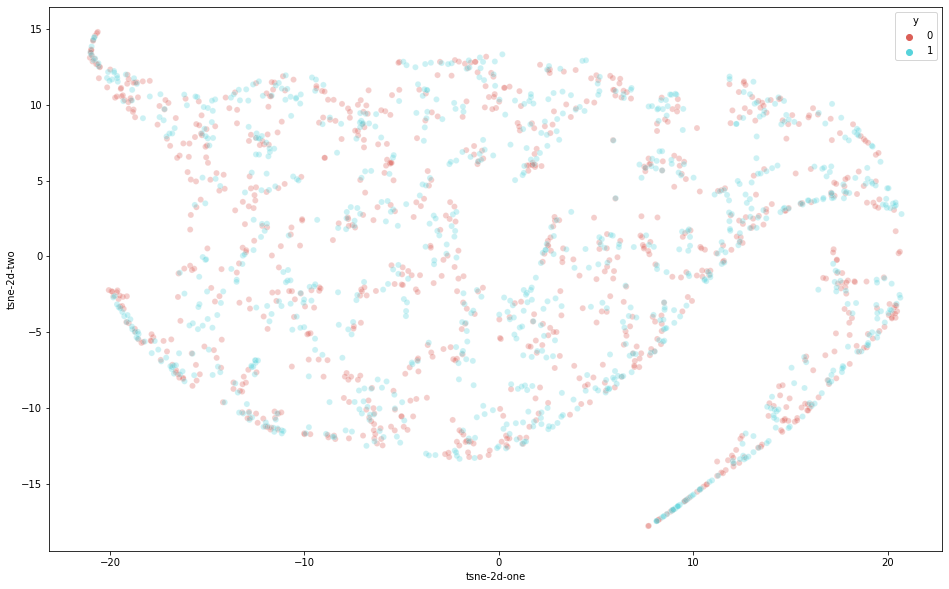

t-SNE - UserKNN-Amplified - Precision@20


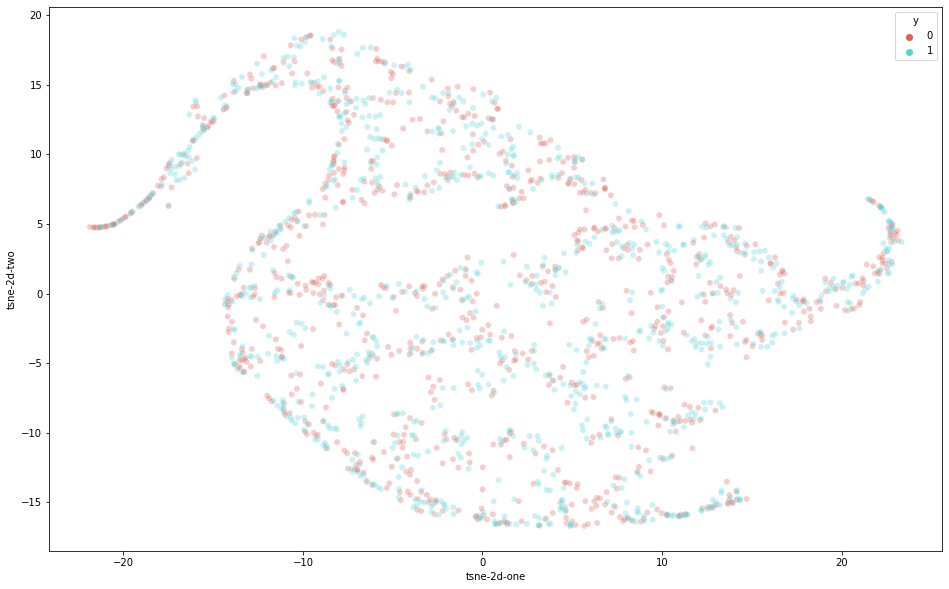

t-SNE - BPR - NDCG@100


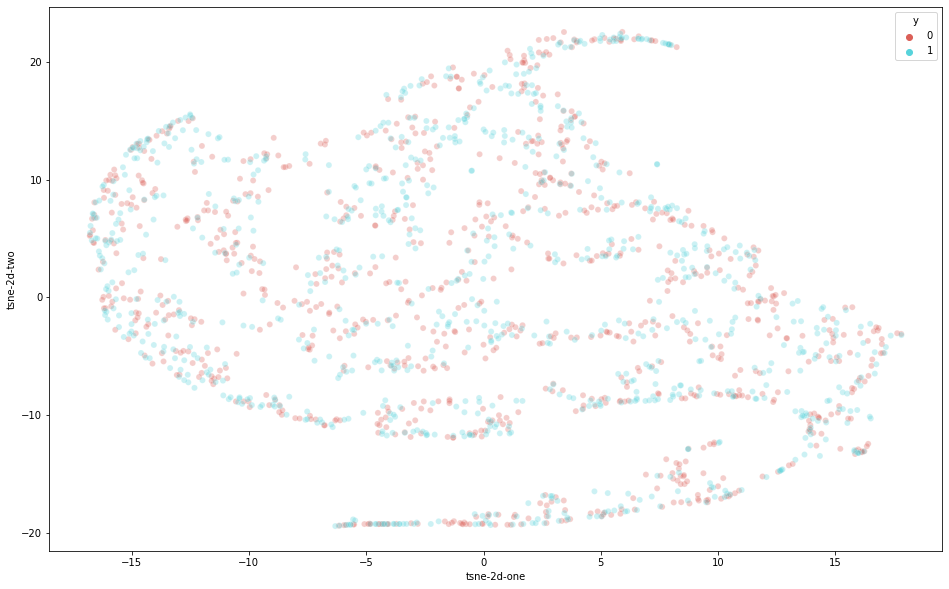

t-SNE - BPR - RMSE


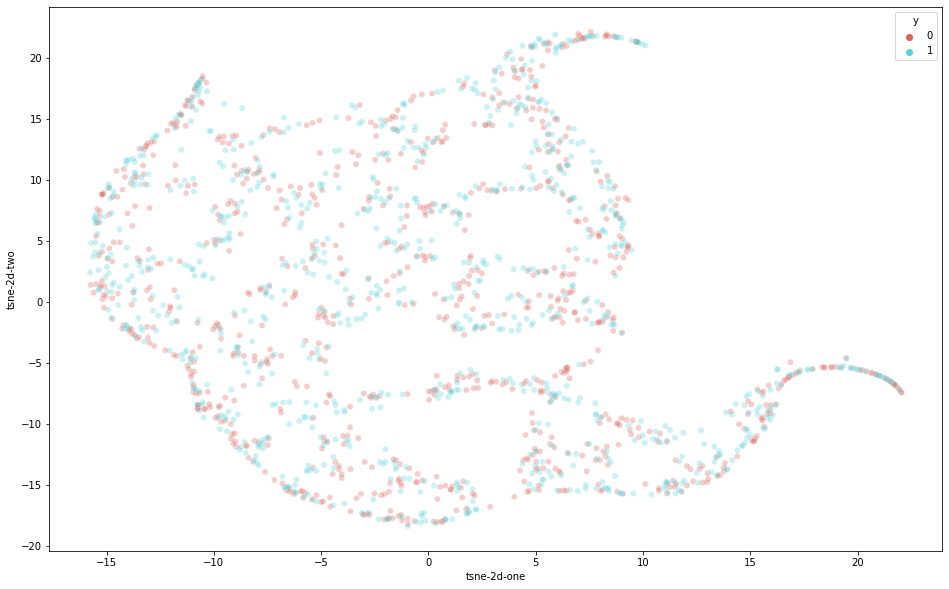

t-SNE - BPR - Precision@20


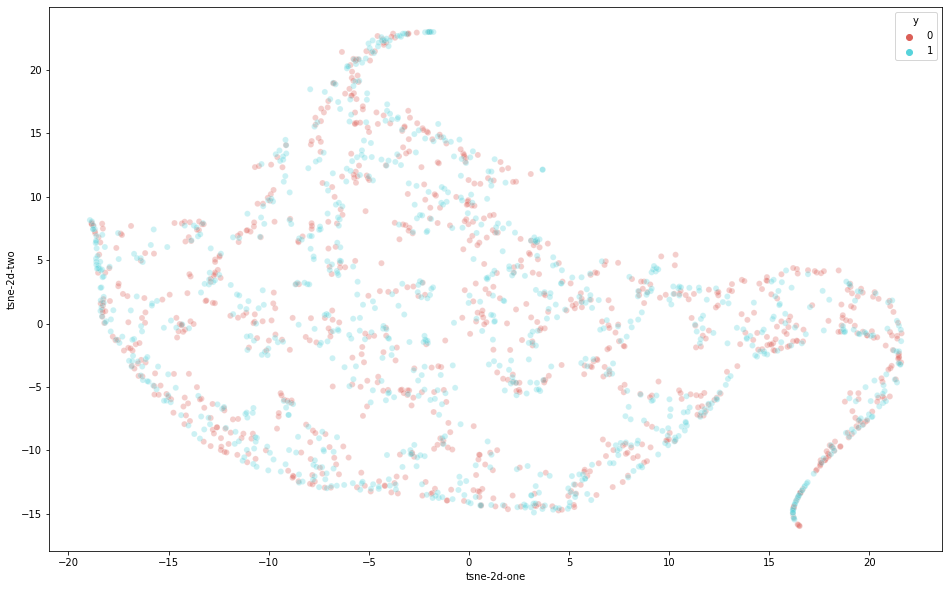

t-SNE - MF - NDCG@100


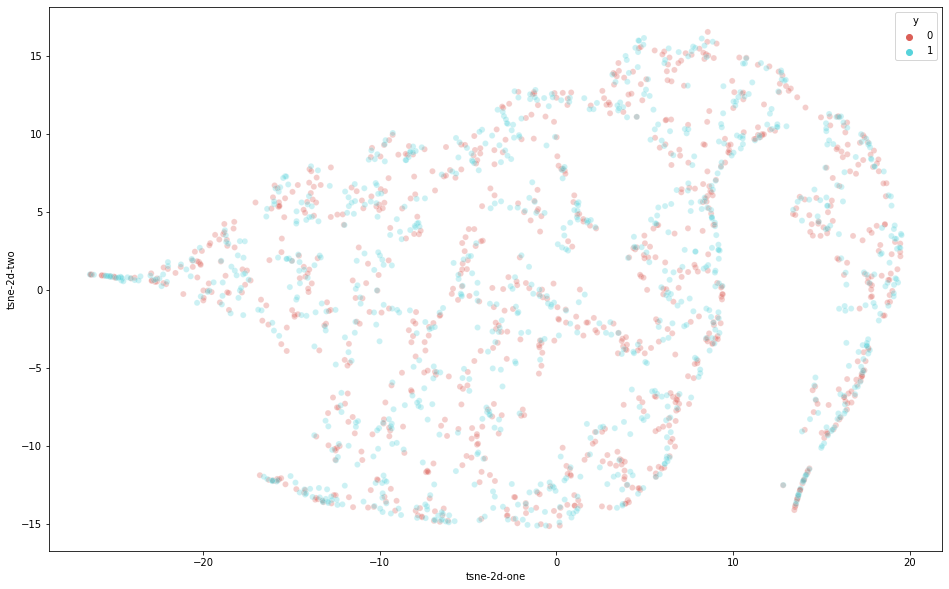

t-SNE - MF - RMSE


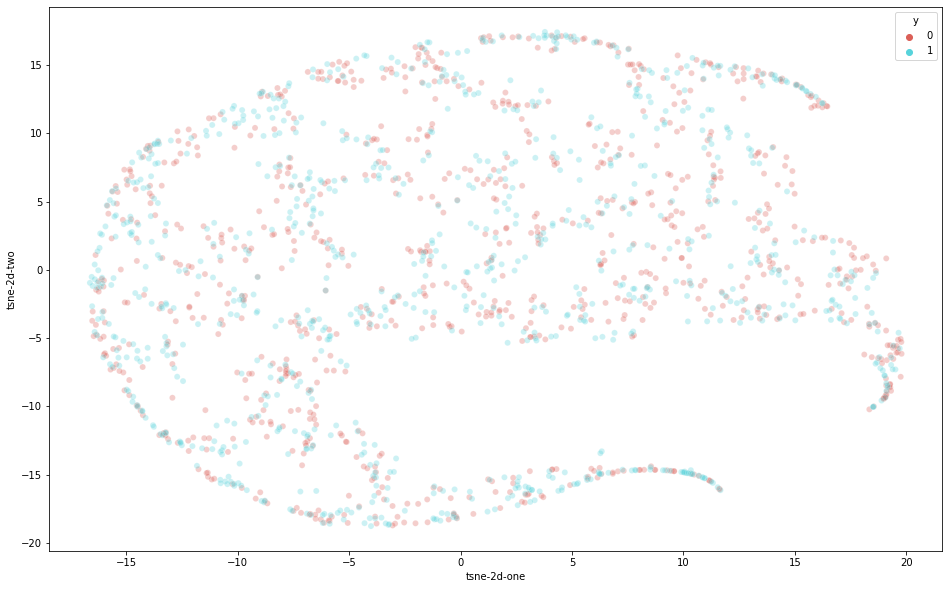

t-SNE - MF - Precision@20


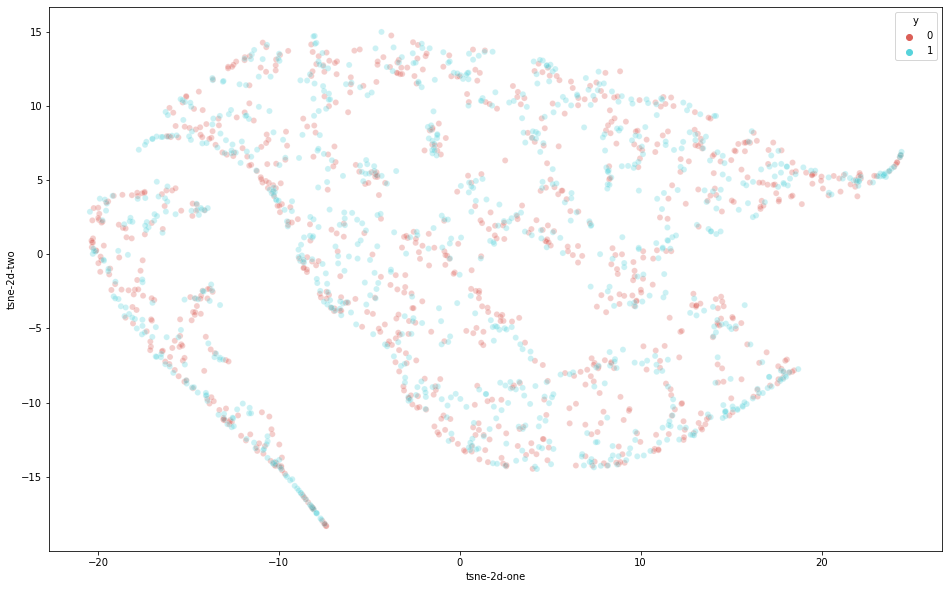

In [106]:
from __future__ import print_function
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

metrics = ["NDCG@100", "RMSE", "Precision@20"]
algos = ["UserKNN-Amplified", "BPR", "MF"]
ammount = 0.15

df_features = pd.read_csv(f"../datasets/{DS}/user_metrics_v2.csv",
                          sep='\s*,\s*', index_col=0, engine='python')
for algo in algos:
    for metric in metrics:
        df_models = pd.read_csv(f"../user_features_table/{DS}/{metric}.csv",
                                sep='\s*,\s*', index_col=0, engine='python')
        df = df_features.join(df_models)

        X, y = divide_into_extreme_groups(df=df, algo=algo, extreme_amount=ammount)
        pca = PCA(n_components=3)
        pca_result = pca.fit_transform(X)
        dfr = pd.DataFrame({})
        dfr[FEATURES] = X
        dfr['pca-one'] = pca_result[:,0]
        dfr['pca-two'] = pca_result[:,1]
        dfr['pca-three'] = pca_result[:,2]
        dfr['y'] = [0 if x == 'bad' else 1 for x in y]
        time_start = time.time()
        tsne = TSNE(n_components=2, verbose=False, perplexity=40, n_iter=300)
        tsne_results = tsne.fit_transform(dfr)
        dfr['tsne-2d-one'] = tsne_results[:,0]
        dfr['tsne-2d-two'] = tsne_results[:,1]
        
        print(f't-SNE - {algo} - {metric}')
        
        plt.figure(figsize=(16,10))
        sns.scatterplot(
            x="tsne-2d-one", y="tsne-2d-two",
            hue="y",
            palette=sns.color_palette("hls", 2),
            data=dfr,
            legend="full",
            alpha=0.3
        )
        plt.show()